# Assignment report for ITNPBD2
This Jupyter Notebook file contains each of the tasks that was needed to attempt the Assignment for ITNPBD2.


# 1) Crossing a road at an angle?
Look at the attached picture. If you were walking from point A to point B that is L meters further down the street, it is obviously shorter to walk in a straight line between the two points (Blue line), rather than crossing the road first (via the crosswalk) and then walking alongside the road for L meters (Red lines)

Your task is to write a script that accomplishes the following:
 1. Calculates the distance that you save by crossing at an angle for any given distance L
 2. Calculates the additional distance travelled on the road by crossing at an angle.
 3. Demonstrates on a graph the upper bound of the distance saved by increasing L
 4. Finds the length L, within 2 decimal points, where the distance saved no longer exceeds the additional distance travelled on the road. That is, the length L when you risk more than you gain.
 5. Demonstrates point 4 on a graph 

You should assume that both sides of the road are straight lines, they are infinitely long, and that they are parallel.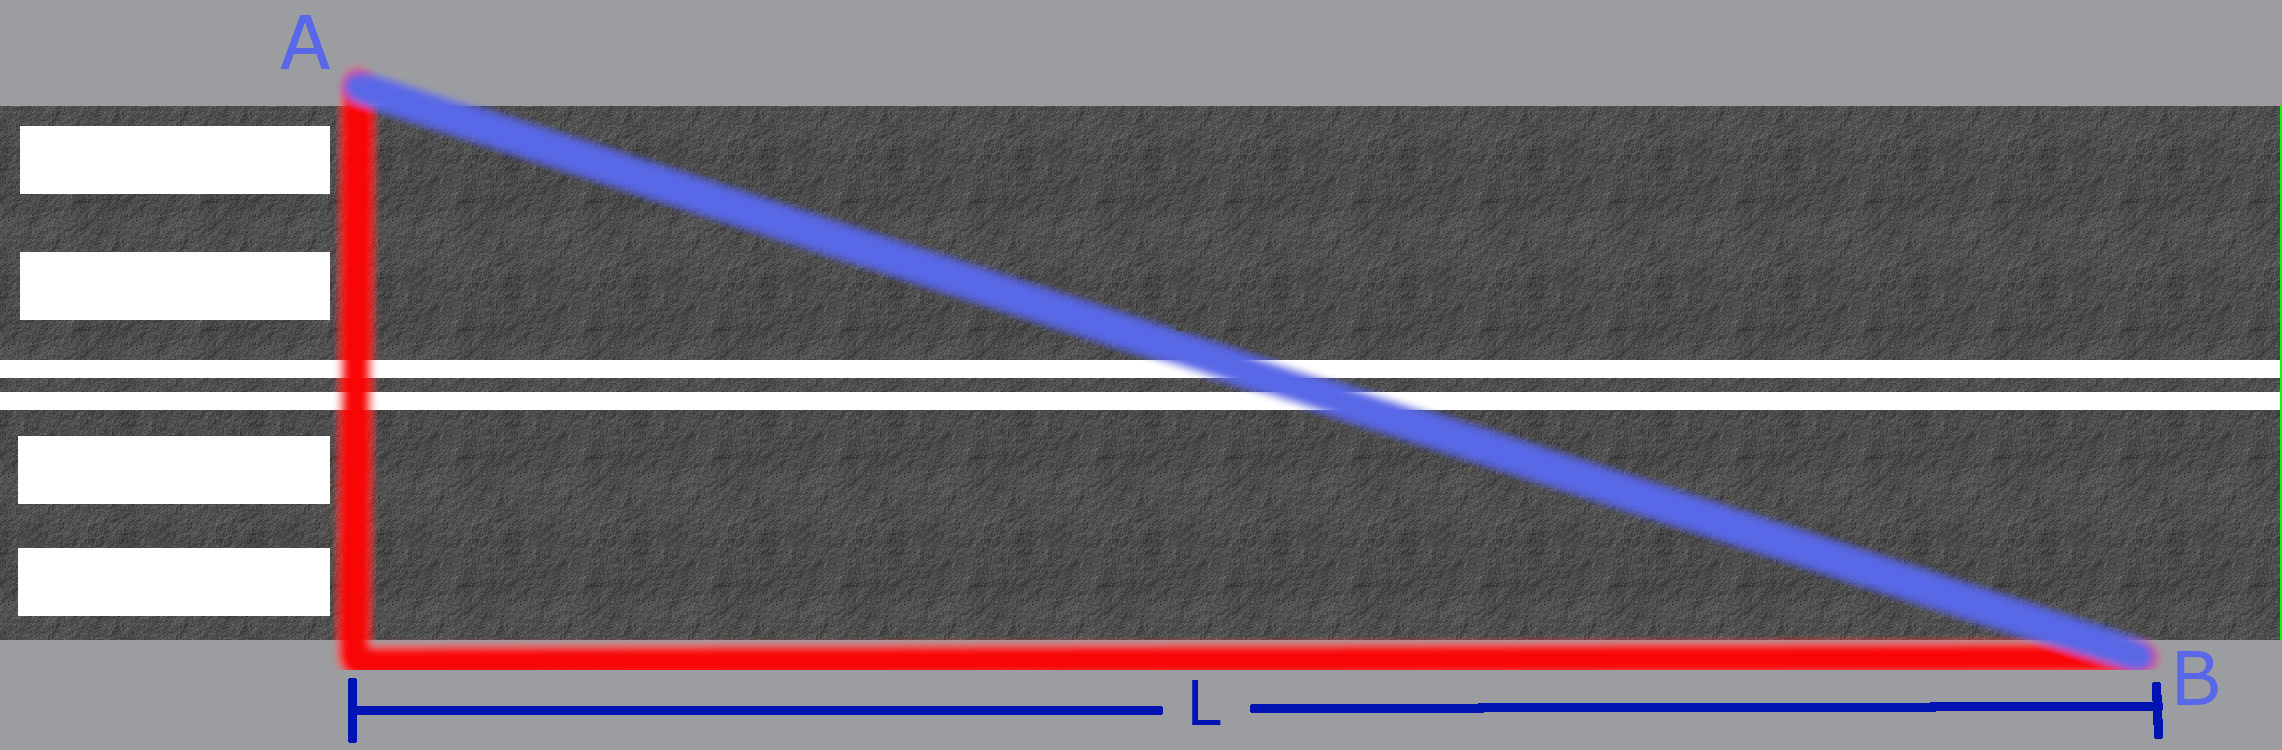

#### Part 1: Calculates the distance that you save by crossing at an angle for any given distance L

In [1]:
from math import sqrt
import matplotlib.pyplot as plt

#Input length and width
length = int(input('Input the Length L: ' ))
width = int(input('Input width of the road: '))

#calculating distance traveled using pythagoras theorem
travel_distance = sqrt((width**2) + (length**2))

# calculating saved distance by subtracting travel distance from the total distance 
saved_distance = (width+length)-travel_distance
print(f"The distance saved by crossing at an angle for a length of {length} is:  " , round(saved_distance, 2))

Input the Length L: 15
Input width of the road: 8
The distance saved by crossing at an angle for a length of 15 is:   6.0


#### Part 2: Calculates the additional distance travelled on the road by crossing at an angle.

In [2]:
#The additional distance travelled on the road
additional_distance = travel_distance - width
print("The additional distance travelled on the road by crossing at an angle is: " , round(additional_distance, 2))

The additional distance travelled on the road by crossing at an angle is:  9.0


#### Part 3: Demonstrates on a graph the upper bound of the distance saved by increasing L

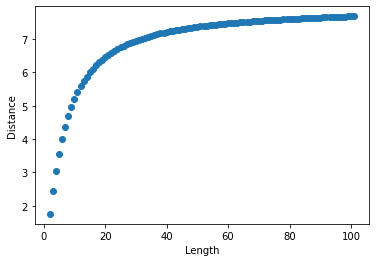

In [3]:
length = 1
lengths = []
saved_distances = [] 
for n in range(100):
    #incrementing distance length 
    length += 1 
    travel_distance = sqrt((width**2) + (length**2))
    saved_distance = (length + width) - travel_distance
    #Figuring out the additional distance travelled on the road and appending it to the list
    lengths.append(length)
    saved_distances.append(saved_distance)
    additional_distance = travel_distance - width
    
#A scatter plot to show saved distance using matplotlib
plt.scatter(x = lengths, y = saved_distances)
plt.xlabel('Length')
plt.ylabel('Distance')
plt.show()

###### it is apparent from above graph that upper bound of saved distance by increasing L is 5 which is the total width of road 

#### Part 4: Finds the length L, within 2 decimal points, where the distance saved no longer exceeds the additional distance travelled on the road. That is, the length L when you risk more than you gain.

In [4]:
length=1
lengths = []
saved_distances = [] 
while True:
    length += 0.01
    travel_distance = sqrt((length**2) + (width**2))
    saved_distance = (width + length)- travel_distance
   #Figuring out the additional distance travelled on the road and appending it to the list
    saved_distances.append(saved_distance)
    additional_distance = travel_distance - width
    lengths.append(additional_distance)

    if saved_distance < additional_distance:
        print("The length where the distance saved no longer exceeds the additional distance travelled on the road is: ", round(length,2))
        break


The length where the distance saved no longer exceeds the additional distance travelled on the road is:  10.67


#### Part 5: Demonstrates part 4 on a graph

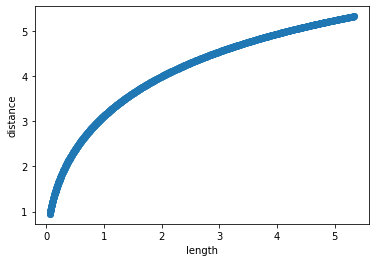

In [5]:
plt.scatter(x = lengths, y = saved_distances)
plt.xlabel('length')
plt.ylabel('distance')
plt.show()

##### above graph shows additional distance travelled keeps getting increased without saved distance increasing after reaching close to 10.67 which is when the distance saved no longer exceeds the additional difference travelled

# 2) Fetch the data
Use requests _get_ to load the data from http://cs.stir.ac.uk/~soh/BD2spring2022/assignmentdata.php into an XML tree, then:
- extract the root element as separate variable, and display the root tag. 
- extract the two children of the root element into another two separate variables, and display their tags as well.

You will need to provide a single parameter to the get request, it has been provided in the code cell below for your convenience, as has the url.

Use Python to accomplish every step of this, i.e. __do not__ manually save the data into a file and then read the file with open() or something equivalent.

Name the tree variable *tree*, the root element *root*, and the children elements *tweets_branch* and *cities_branch*


In [6]:
import xml.etree.ElementTree as ET
import requests
url = "http://cs.stir.ac.uk/~soh/BD2spring2022/assignmentdata.php"
params = {'data':'spuxqxx'}

#loading data from url using requests get method
tree = requests.get(url, params = params)

#extracting root element
root = ET.fromstring(tree.text)

#displaying root tag
print("root tag:  ", root.tag.upper())

#extracting first child of root into tweets_branch
tweets_branch = root[0]

#displaying tag of 1st child
print("tweets branch(child element) tag: ", tweets_branch.tag.upper())

#extracting 2nd child of root into cities_branch
cities_branch = root[1]

#displaying tag of 2nd child
print("cities branch(child element) tag: ", cities_branch.tag.upper())

root tag:   TWITTER_DATA
tweets branch(child element) tag:  TWEETS
cities branch(child element) tag:  CITIES


# 3) Separate the two branches into two lists of dictionaries
Create two variables __cities__ and __tweets__ that contain each main branch of the XML tree as lists of dictionaries.  
Make sure that the data values are of appropriate types.  
Print out the field names and values (keys and values) of one city and one tweet.

*hint: latitude and longitude might be best kept as strings*  

In [7]:
tweets = []
#populating the list of dictionaries using for loop on tree elements
for tweet in tweets_branch:
    temp_dict = { 
        'id' : tweet.attrib['id'],
        tweet[0].tag : tweet[0].text,
        tweet[1].tag : tweet[1].text,
        tweet[2].tag : tweet[2].text,
        tweet[3].tag : tweet[3].text,
        tweet[4].tag : tweet[4].text,
        tweet[5].tag : tweet[5].text,
        tweet[6].tag : tweet[6].text,
        tweet[7].tag : tweet[7].text,
        tweet[8].tag : int(tweet[8].text)
    }
    tweets.append(temp_dict)

#printing the field names and values (keys and values) of one tweet
print("Key and Values for one tweet are: ")
for key in tweets[0]:
    print(key + ':  ', tweets[0][key])

Key and Values for one tweet are: 
id:   16620625 5686
Name:   Kenyon Conley
Phone:   0327 103 9485
Email:   malesuada@lobortisClassaptent.edu
Location:   45.5333, -73.2833
GenderID:   male
Tweet:   #FollowFriday @DanielleMorrill - She's with @Seattle20 and @Twilio. Also fun to talk to.  #entrepreneur
City:   Saint-Basile-le-Grand
Country:   Canada
Age:   34


In [8]:
cities = []
for city in cities_branch:
    temp_dict = {
        'id' : city.attrib['id'],
        city[0].tag : city[0].text,
        city[1].tag : city[1].text,
        city[2].tag : city[2].text,
        city[3].tag : city[3].text,
        city[4].tag : city[4].text,
        city[5].tag : city[5].text,
        city[6].tag : city[6].text,
        city[7].tag : city[7].text,
        city[8].tag : int(city[8].text)
    }
    cities.append(temp_dict)

#printing the field names and values (keys and values) of one city
print("Key and Values for one city are: ")
for key in cities[0]:
    print(key + ':  ', cities[0][key])

Key and Values for one city are: 
id:   1036323110
city:   Katherine
city_ascii:   Katherine
lat:   -14.4667
lng:   132.2667
country:   Australia
iso2:   AU
iso3:   AUS
capital:   None
population:   1488



# 4) How many unique City - Country pairs exist in the data?
Find out how many different locations are represented in the twitter data with City and Country pairs.  
Does the tweet data contain more, less, or equal number of pairs?

- Print out the 10 most populated cities (largest)
- Print out the __number__ of unique pairs and show that they match the number of cities in the cities branch.

You can either use ElementTree methods on the XML tree itself or work with the list of dictionaries variables in addition to any looping and built-in functionality you see fit.  


In [9]:
#sort cities list of dictionaries by population
sorted_cities = sorted(cities, key=lambda x: x['population']) 
print("10 most populated cities are: ")

for city in sorted_cities[-10:]:
    print(city['city'],':  ',city['population'])

#list of Unique city-country pairs
unique_pairs = []

#using for loop for populating uniquepairs from twitter data.
for tweet in tweets:
    #checking if city or country is not none
    if tweet['City'] is not None and tweet['Country'] is not None:
        #checking if pair s already in the list(meaning its not unique)
        if tweet['City'] + ': ' + tweet['Country'] not in unique_pairs:
            #add to the list if previous conditions are true
            unique_pairs.append(tweet['City'] + ': ' + tweet['Country'])

10 most populated cities are: 
Kilosa :   91889
PaulÃ­nia :   97702
Botucatu :   139648
Narashino :   173716
Singkawang :   230376
Aachen :   247380
Al Bayá¸Äâ :   250000
Jiangshan :   467862
Staten Island :   476143
Ruiming :   640600


In [10]:
#Printing out the number of unique pairs and cities in the cities branch to see if both are same
print('The number of unique pairs in twitter data:  ', len(unique_pairs))
print('The number of cities in the cities branch:  ', len(cities))

The number of unique pairs in twitter data:   40
The number of cities in the cities branch:   40


# 5) Extract the data into Pandas Dataframes
Create __2__ Pandas Dataframes from the list of dictionaries and make sure you use appropriate data types for each column  
There are missing values in the data and make sure they are represented in the Dataframe with *NaN*  

Call the Dataframes variable __raw_tweet_data__ and __cities_data__

Include the ID of each person as a column and display the first 5 rows of the dataframe

*hint: each person's id is the id attribute of the corresponding xml tag*  

In [11]:
# Write your code and  comments here  below
import pandas as pd

#creating 2 pandas Datafranes from the list of dictionaries
raw_tweet_data = pd.DataFrame(tweets)
cities_data = pd.DataFrame(cities)

#displaying the first 5 rows of the twitter dataframe
display(raw_tweet_data.head())
print("The shape of the twitter data is: ", raw_tweet_data.shape)

,id,Name,Phone,Email,Location,GenderID,Tweet,City,Country,Age
0,16620625 5686,Kenyon Conley,0327 103 9485,malesuada@lobortisClassaptent.edu,"45.5333, -73.2833",male,#FollowFriday @DanielleMorrill - She's with @S...,Saint-Basile-le-Grand,Canada,34
1,16310427-5502,Griffin Norton,0306 178 7917,in.dolor.Fusce@necmalesuadaut.ca,"52.0000, 84.9833",male,!!!Veryy Bored!!! ~~Craving Million's Of Milk...,Belokurikha,Russia,33
2,16501010 4957,Benjamin Haley,(019348) 22077,posuere@hymenaeos.edu,"-14.4667, 132.2667",male,i knew this would happen !! i'd start feeling ...,Katherine,Australia,62
3,16110430 8679,Thaddeus Ashley,0845 46 42,penatibus.et@Donecfeugiatmetus.net,"40.5626, -74.5743",male,#bgt I like Julian smith as well his music is ...,Finderne,United States,49
4,16990624/4174,Ian Ramos,0800 816 7844,pede.nonummy@Vestibulumut.edu,"27.7526, -82.7394",male,will be online in a lil' bit,South Pasadena,United States,26


The shape of the twitter data is:  (1400, 10)


In [12]:
display(cities_data.tail())
print("The shape of the cities data is: ", cities_data.shape)

,id,city,city_ascii,lat,lng,country,iso2,iso3,capital,population
35,1276805572,Aachen,Aachen,50.7762,6.0838,Germany,DE,DEU,minor,247380
36,1008765146,Roskovec,Roskovec,40.7375,19.7022,Albania,AL,ALB,None,6657
37,1392933042,Narashino,Narashino,35.6808,140.0267,Japan,JP,JPN,None,173716
38,1840031158,West Springfield,West Springfield,42.1253,-72.6503,United States,US,USA,None,28517
39,1826824753,Hindley,Hindley,53.5355,-2.5658,United Kingdom,GB,GBR,None,25001


The shape of the cities data is:  (40, 10)


# 6) Clean the twitter data
Find the missing values and replace, remove, and standardise as appropriate
- ID should be standardised to XXXXXXXX-XXXX (i.e. 8 and 4 digits separated by a dash), make the ID the index of the dataframe
- Records with missing tweets, age, name, city, or location should result in a removal of the data point
- Phone numbers should be strings but only contain digits, no other characters or whitespaces and missing phone numbers should be replaced with the string '000'
- Missing country should be replaced with the country that corresponds to the city if possible.
 * I.e. find another data point with the same city and copy the country, if there is no other record with the same city then remove.
 * __This does not need to be completed programmatically__, that is, you can use one cell to supply the information and then another cell to fix it with direct assignment statements. Full marks will be given for this approach if the intensions are clear and the code is well formed and documented.

Store the resulting cleaned dataframe in __cleaned_tweet_data__  
__Print the total number of records and the number of rows with missing values before and after cleaning__

In [13]:
#making a copy of raw_tweet_data to clean
cleaned_tweet_data = raw_tweet_data

#replacing all spaces and backslashes in id with dashes
cleaned_tweet_data['id'] = cleaned_tweet_data['id'].str.replace(' ', '-')

cleaned_tweet_data['id'] = cleaned_tweet_data['id'].str.replace('/', '-')    

#counter variable to check how many ids are not standardised
count = 0

#loop to check if all id's are standardised.
for i in cleaned_tweet_data.id:
    #checking if length of id is 13 characters and 8th character is a dash to make sure Id is
    #standardised to XXXXXXXX-XXXX 
    if not((len(i) == 13) or i[8] == '-'):
        #incrementing to the counter if id is not standardised 
        count += 1

print("Number of instances where id is not standardised: ", count)

Number of instances where id is not standardised:  0


In [14]:
#droping all rows with missing values of the tweets, name,  age, location or city from df
cleaned_tweet_data.dropna(subset = ['Tweet','Age','Name','City','Location'], inplace=True)

#reset index
cleaned_tweet_data.reset_index(drop = True, inplace = True)

#loop to format/clean phone number column
for i,r in enumerate(cleaned_tweet_data['Phone']):
    #removing whitespaces and other non numeric characters
    cleaned_tweet_data.at[i, 'Phone'] = ''.join([v for v in r if v.isdigit()])
    #replacing empty/null entries with string '000'
    if (len(cleaned_tweet_data.Phone[i]) <= 1) or pd.isnull(cleaned_tweet_data.Phone[i]) :
        cleaned_tweet_data.at[i,'Phone'] = '000'

In [15]:
#find out cities and their row id in datafreame from rows where country is missing
city_List = []

for i,v in enumerate(cleaned_tweet_data.Country):
    #check if country is missing
    if pd.isnull(v):
        #append row id in list for missing country
        city_List.append(i)
        #append city name in list for missing country
        city_List.append(cleaned_tweet_data.City[i])

In [16]:
#find out country names of cities in cityList( list of cities with mising country names)
country_List = []

#it is to only increment for city name and not for row id that is also in same list
i = 1

# loop only 50% of the time because remaining 50% are row ids 
for n in range(int(len(city_List)/2)):
    #putting country names in country list using city names from cityList which have required city names
    country_List.append(cleaned_tweet_data.loc[cleaned_tweet_data.City == city_List[i]][:1].Country.values[0])
    #inrementing to select next city name 
    i += 2

In [17]:
#to increment only for rowidand in list and not for name of city in same list
i=0
for country in country_List:
    #putting name of country in df from country list against rowid in cityList 
    cleaned_tweet_data.at[city_List[i], 'Country'] = country
    i += 2

# 7) Validating
Use the data from __cities_data__ to check if there are any mismatches in the data.
- Are there latitudes and longitudes that don't match the City name?
- Are there any cities that are "located" in the wrong country?

Correct where possible, remove otherwise.  
Assume the cities data is accurate and use the "city" columns to match names

Correct the __cleaned_tweet_data__ in place and __print, display or comment on how many mismatches you found__

This does not have to be done programmatically in a single comprehensive search-and-fix code. You can use 1 or more cells and "hard code" the search and the fixes with incremental steps.  
For example, the first cell prints out info of mismatches, what and where they are and the next cell uses that info to fix the mismatches. 

In [18]:
#populating dictionary dict with accurate data from cities branch so we can use it for checking mismatches in data
dict = {}
for i,v in enumerate(cities_data.city):
    dict[v] = cities_data.lat[i] + ', ' + cities_data.lng[i]

In [19]:
#loop through each city in dictionary of accurate data dict
for key in dict:
    #make a temp boolean df which consists of list of series from all the instances where Name of city  in twitter data is same as name of city in dic but has different longitude and lattitude value 
    temp_Df = (cleaned_tweet_data.City[cleaned_tweet_data.Location != dict[key]] == key)
    #if condition to check if the series is not empty 
    if not temp_Df[temp_Df == True].empty:
        #print all the instances where temp boolean df is true meaning where lattitude and longitude don't match the name of city
        print(temp_Df[temp_Df == True])

196    True
Name: City, dtype: bool
5    True
Name: City, dtype: bool
673    True
Name: City, dtype: bool


In [20]:
cleaned_tweet_data.at[196, 'Location'] = dict[cleaned_tweet_data.City[196]]
cleaned_tweet_data.at[5, 'Location'] = dict[cleaned_tweet_data.City[5]]
cleaned_tweet_data.at[673, 'Location'] = dict[cleaned_tweet_data.City[673]]

In [21]:
cleaned_tweet_data.at[673, 'Location']

'48.4878, -122.6292'

In [22]:
#populating dictionary dict with accurate data from cities branch so we can use it for checking mismatches
dict = {}
for i,v in enumerate(cities_data.city):
    dict[v] = cities_data.country[i]

for key in dict:
    #make a temp boolean df which consists of list of series from all the instances where City name in twitter data is same as city name in dictionary but with different country name   
    temp_Df = (cleaned_tweet_data.City[cleaned_tweet_data.Country != dict[key]] == key)
    #if condition to check if the series is not empty 
    if not temp_Df[temp_Df == True].empty:
        #print all the instances where temp boolean df is true meaning where name of country don't match the name of city
        print(temp_Df[temp_Df == True])

#### There ain't any cities in our cleaned data which are placed in wrong country

# 8) Grouping by country and city
Find out 
- the mean, median, and standard deviation of the age for each country.
- Answer the following:
 - What country has the most tweeters?
 - What __city__ has the most tweeters per capita?
 
The cities data contains information about population

In [23]:
#Median, mean and std of age for each country
cleaned_tweet_data.groupby('Country').Age.agg(['mean', 'median', 'std'])

,mean,median,std
Country,,,
Albania,46.540541,48.0,17.799180
Australia,44.753425,43.0,14.471985
Brazil,47.218750,50.0,15.922313
Canada,46.841270,47.0,17.226392
China,44.275362,43.0,16.578587
Cuba,51.407407,57.0,15.821746
Czechia,48.875000,51.5,17.584359
Ethiopia,48.410256,48.0,14.624633
France,46.619718,48.0,15.148188


In [24]:
print("The country with the most number of tweeters is: ", cleaned_tweet_data.Country.value_counts().index[0])

The country with the most number of tweeters is:  United States


In [25]:
#making new dataFrame with quantity of tweeters in every city
df =pd.DataFrame(cleaned_tweet_data.City.value_counts()).rename(columns={'City':'Tweeters'})
df = df.rename_axis('City').reset_index()

#including per_capita col in dataframe by deviding quantity of tweeters by population of city
df['Tweeters_per_capita'] = df.sort_values('City').Tweeters.reset_index(drop=1)/cities_data.sort_values('city').population.reset_index(drop=1)

In [26]:
#Displaying the name of the city with most tweeters per capita
print("The city with most tweeters per capita is: ", df.sort_values('Tweeters_per_capita', ascending=False).City[:1].values[0])

The city with most tweeters per capita is:  West Springfield


# 9) Plot the age distribution by country
Create a figure that contains the distribution of age per country as box plots.  
For each box, visually show the mean and the confidence interval of the median in the figure, preferably using arguments of the plot function.

In [27]:
#creating a temprory series with country name as index and list of all tweeters age in that country as value
temp = cleaned_tweet_data.groupby('Country')['Age'].apply(list)


In [28]:
#creating new data frame using first country name in series as column name and all its list values as the data in that column
newDf = pd.DataFrame(temp.reset_index()['Age'][0], columns =[temp.reset_index()['Country'][0]])

In [29]:
#loop through whole series to repeat the process and concatinate all the columns into the dataframe created above
for i,v in enumerate(temp):
    # do nothing if its first country since we have already addes first country and data to the dataframe before starting loop
    if(i==0):
        pass
    #make a temprory data frame on each iteration and then concat it to the main dataframe
    else:
        df1 =pd.DataFrame(v, columns =[temp.index[i]])
        newDf = pd.concat([newDf, df1], axis=1)

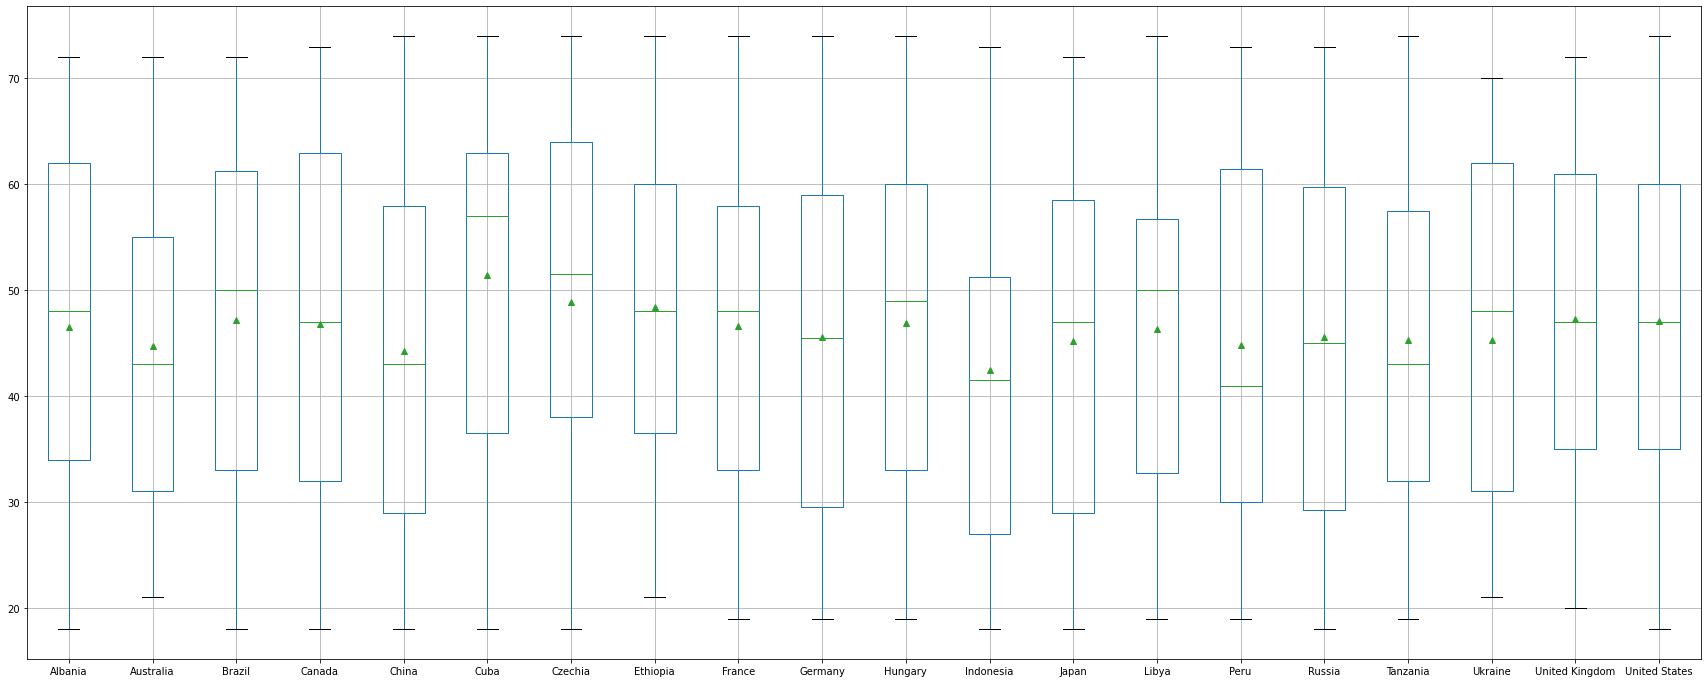

In [30]:
newDf.boxplot(showmeans= True, figsize=[30,12])
plt.show()

# 10) Freestyle
Your answer will be judged by the clarity of the description, the creativity of the solution, and how realistic your suggested implementation is.

This is an opportunity to display what you have learnt in the module and how you believe it can be useful in practice.

### The task
Choose any dataset on Kaggle (https://www.kaggle.com/) and describe a simple data analysis you would want to do with that dataset.
- Provide the link to the dataset, and describe it __in your own words__ (very short, 3-10 sentences max)
- Justify your choice of the dataset (max 50 words)
- Document your process with a mix of appropriate comments and markdown boxes inbetween code boxes.
- Assume we have access to the dataset and if we would download it into the __current working directory__ we would be able to do the same analysis on our machine
 - If possible, don't make any other assumptions about the folder structure on the machine the code would be run on. That is, make your solution as OS and folder agnostic as possible.
- Implement as much of your idea as possible, using solutions you have learnt in this module. 
 - Go through the process of *load->inspect->clean->explore->visualise->etc* and document each step
- For the ideas that require solutions or tools not covered in this module, provide at least a brief description and suggestions of what tools or solutions you would use.
- Be as clear and concise as you possibly can

# Link 
https://www.kaggle.com/datasets/zusmani/pakistandroneattacks

### Description
The US started conducting drone attacks on Pakistan trying to target the milliatants since 2004.
This dataset have details regarding drone attacks conducted in different places inside Pakistani and people killed by those drone attacks.

### Justification for choosing the dataset
while looking online you hardly find accurate and comprehensive reports about how many people are killed each year by the US forces through drone attackes and this is the most accurate dataset I could come accross online to research and make visualisations and reports.

In [31]:
import zipfile as zf
import pandas as pd
#using zipfile library to read the file
zf = zf.ZipFile("archive.zip", "r")
df1 = pd.read_csv(zf.open("PakistanDroneAttacksWithTemp Ver 11 (November 30 2017).csv"), encoding =  'latin1')

In [32]:
display(df1.head())

,S#,Date,Time,Location,City,Province,No of Strike,Al-Qaeda,Taliban,Civilians Min,...,Injured Min,Injured Max,Women/Children,Special Mention (Site),Comments,References,Longitude,Latitude,Temperature(C),Temperature(F)
0,1.0,"Friday, June 18, 2004",22:00,Near Wana,south Waziristan,FATA,1.0,NaN,1.0,0.0,...,NaN,NaN,N,Blast occured in courtyard of the house of lon...,Village in Wana,http://archives.dawn.com/2004/06/19/top1.htm,69.9000,33.0333,28.475,83.255
1,2.0,"Sunday, May 08, 2005",23:30,Mir Ali (Near Afghan Border),North Waziristan,FATA,1.0,1.0,NaN,0.0,...,NaN,NaN,N,Drone struck a car driven by local warlord- ki...,Civilian killied was Samiullah Khan who was a ...,http://www.msnbc.msn.com/id/7847008/,70.1455,32.9746,11.475,52.655
2,3.0,"Thursday, December 01, 2005",NaN,Haisori- Miran Shah,North Waziristan,FATA,1.0,1.0,NaN,0.0,...,NaN,2.0,NaN,Explosive occurred at a mud house,No. 3 Al-Qaeda's Leader AbuHamza Rabia killed ...,http://edition.cnn.com/2005/WORLD/asiapcf/12/0...,70.1455,32.9746,7.080,44.744
3,4.0,"Friday, January 06, 2006",NaN,Saidgai village- 115km north of Wana,North Waziristan,FATA,1.0,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,http://www.reuters.com/article/2007/04/27/us-p...,70.1455,32.9746,0.535,32.963
4,5.0,"Friday, January 13, 2006",3:00,Damadola Village,Bajaur Agency,FATA,1.0,NaN,NaN,0.0,...,NaN,2.0,Y,Three houses were tarheted in Damadola village...,Masood Khan house was among those bombed. Want...,http://www.dailytimes.com.pk/default.asp?page=...,71.5000,34.6833,10.025,50.045


In [33]:
print("The shape of our dataframe is:" , df1.shape)

The shape of our dataframe is: (406, 25)


In [34]:
print("The data types for each column are:\n")
print(df1.dtypes)

The data types for each column are:

S#                        float64
Date                       object
Time                       object
Location                   object
City                       object
Province                   object
No of Strike              float64
Al-Qaeda                  float64
Taliban                   float64
Civilians Min             float64
Civilians Max             float64
Foreigners Min            float64
Foreigners Max            float64
Total Died Min            float64
Total Died Max            float64
Injured Min               float64
Injured Max               float64
Women/Children             object
Special Mention (Site)     object
Comments                   object
References                 object
Longitude                 float64
Latitude                  float64
Temperature(C)            float64
Temperature(F)            float64
dtype: object


In [35]:
#checking to see the count of null values in columns 
print(df1.isna().sum())

S#                          1
Date                        1
Time                      231
Location                    2
City                        1
Province                    1
No of Strike                1
Al-Qaeda                  308
Taliban                   264
Civilians Min              69
Civilians Max              46
Foreigners Min            312
Foreigners Max            265
Total Died Min             97
Total Died Max              3
Injured Min               260
Injured Max               129
Women/Children             69
Special Mention (Site)     75
Comments                  229
References                  7
Longitude                   1
Latitude                    1
Temperature(C)              2
Temperature(F)              2
dtype: int64


## Cleaning the data

Since we only want to see how many people have died each year so don't need most of these columns so we will drop them

In [36]:
#dropping the unnecessary columns
df1.drop(['S#','Time','Temperature(C)','Temperature(F)','Comments','References','Special Mention (Site)','Longitude','Latitude'], axis=1, inplace=True)

Now we remove all whitespaces/extra spaces from remaining columns names so its easier to work with them

In [37]:
df1.rename(columns=lambda x: x.strip(), inplace=True)

We will drop rows with no date because we want to find out how many people died each year
will also drop where Total Max casualities are not known

In [38]:
df1.dropna(subset=['Date','Total Died Max'], inplace=True)

In [39]:
print(df1.isna().sum())

Date                0
Location            1
City                0
Province            0
No of Strike        0
Al-Qaeda          306
Taliban           262
Civilians Min      67
Civilians Max      44
Foreigners Min    309
Foreigners Max    262
Total Died Min     94
Total Died Max      0
Injured Min       257
Injured Max       128
Women/Children     67
dtype: int64


as we can see location and women and children are only string columns with null values so for women and children we'll replace it with a string 'maybe' and for location with string 'unknown'

In [40]:
df1.fillna({'Location': 'Unkown', 'Women/Children': 'maybe'}, inplace=True)

In [41]:
df1.fillna(0)

,Date,Location,City,Province,No of Strike,Al-Qaeda,Taliban,Civilians Min,Civilians Max,Foreigners Min,Foreigners Max,Total Died Min,Total Died Max,Injured Min,Injured Max,Women/Children
0,"Friday, June 18, 2004",Near Wana,south Waziristan,FATA,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,N
1,"Sunday, May 08, 2005",Mir Ali (Near Afghan Border),North Waziristan,FATA,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,N
2,"Thursday, December 01, 2005",Haisori- Miran Shah,North Waziristan,FATA,1.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,2.0,maybe
3,"Friday, January 06, 2006",Saidgai village- 115km north of Wana,North Waziristan,FATA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,maybe
4,"Friday, January 13, 2006",Damadola Village,Bajaur Agency,FATA,1.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,18.0,0.0,2.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,"Monday June 12, 2017",Spin Thal,Hangu,KPK,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,N
401,"Monday July 03, 2017",Marghalan village,South Waziristan,FATA,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,N
402,"Friday September 15, 2017",Ghuz Ghari,Kurram Agency,FATA,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,2.0,N
403,"Monday October 16, 2017",Kurram district,Lower Kurram Agency,FATA,4.0,0.0,5.0,0.0,0.0,0.0,0.0,17.0,26.0,0.0,0.0,N


formate date column and create new year column from it

In [42]:
df1['Date'] = df1['Date'].str.strip()
df1['Date'] = df1['Date'].str.replace(',', '-')
df1['year'] = pd.DatetimeIndex(df1['Date']).year

## Visualization

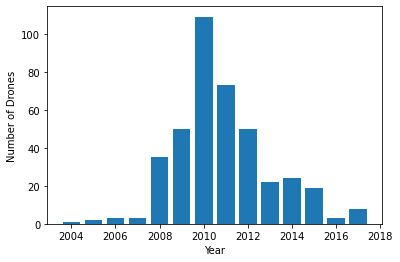

In [43]:
#Showing the number of drone strikes each year by using the bar plot
plt.bar(list(df1['year'].value_counts().index), list(df1['year'].value_counts().values))
plt.xlabel('Year')
plt.ylabel('Number of Drones')
plt.show()

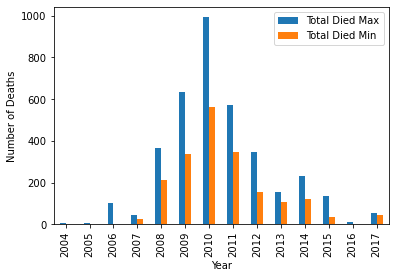

In [44]:
#Maximum and minimum number of casualities each year
df1.groupby('year')[['Total Died Max','Total Died Min']].sum().plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.show()

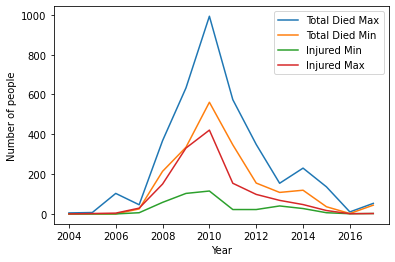

In [45]:
#people injured and killed per year
df1.groupby('year')[['Total Died Max','Total Died Min','Injured Min','Injured Max']].sum().plot()
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.show()